Import the libraries that will be used throughout the examination of the data

In [16]:
# Importing important Libraries used by all
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import library for split and train
from sklearn.model_selection import train_test_split

# Import for linear Regression
from sklearn.linear_model import LinearRegression

# Import for PCA
from sklearn.decomposition import PCA

# Import for Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import for Decision Tree Reg
from sklearn.tree import DecisionTreeRegressor

# Import for K-Fold
from sklearn.svm import SVC

# K-Fold cross validation
from sklearn.model_selection import cross_val_score

# Import for normalizing
from sklearn.preprocessing import StandardScaler

# Import for finding the error of the model
from sklearn import metrics

# Import for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

#Backward Elimination
import statsmodels.api as sm

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

Load in the premier league data set and clean it up so it can be examined

In [33]:
# Loading in the data set being used
dataset = pd.read_csv('complete_gws.csv', encoding="ISO-8859-1")

print(dataset.shape)
# Clean up the data
# DROP VALUES:
dataset.drop(["name", "kickoff_time", "kickoff_time_formatted"]
            , axis=1, inplace=True)

# Remove bad instances located near bottom of set
dataset=dataset.iloc[:67936,:]

# Remove all players with minutes = 0
dataset = dataset[dataset.minutes!=0]

# Set the target y as goal_scored and x as remaining columns
X = dataset.iloc[:,dataset.columns != "goals_scored"].values
y = dataset.iloc[:,dataset.columns == "goals_scored"].values.flatten()


(72784, 55)


Split for train(.70) and test(.30) data

In [34]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

print(np.unique(y_test), len(X_train), len(y_train),X[0],y[0])

[0 1 2 3 4] 21981 21981 [0 3 0 0 0.0 6 0 1 2 0.3 0.0 0 142 0 0 3 0 0 0.9 142 8.2 0 0 0 15 0 0 17
 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 13918.0 1.0 2.0 0.0 1.0 1.0 0.0 1.0 0.0
 0.0 0.0 60.0 True 0.0 0.0] 0


Lets examine the data before setting it to the different models selected

[20055  1717   189    17     3]


<BarContainer object of 5 artists>

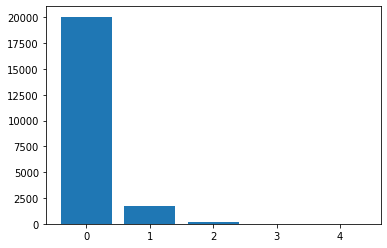

In [35]:
total_goals = np.unique(y_train, return_counts=True)

print(total_goals[1])
plt.bar(total_goals[0],total_goals[1])

Normalizing the data to make sure no one variable pulls to much on the prediction. (Do We Need to Normalize)

In [36]:
# Normalizing the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Fitting the data to a Multiple Linear Regression Model

In [44]:
# Fitting the multiple linear regresion to the training set
mlr_obj = LinearRegression()
mlr_obj.fit(X_train, y_train)

num_culmn_raw  = X_train[0,:]

print("The weight parameters are:")

for idx, col_name in enumerate(dataset.columns[:len(num_culmn_raw)]):
    print("({}) {}: {}".format(idx, col_name, mlr_obj.coef_[idx]))

# Predicting on the test set
mlr_y_pred = mlr_obj.predict(X_test)


The weight parameters are:
(0) assists: -0.1141715686336776
(1) attempted_passes: 0.03606970068899537
(2) big_chances_created: -0.017335632090511935
(3) big_chances_missed: 0.003973182160641471
(4) bonus: -0.011791005823273915
(5) bps: 0.11747166623446664
(6) clean_sheets: -0.04871384641888769
(7) clearances_blocks_interceptions: -0.1256885074350298
(8) completed_passes: -0.09124202340649773
(9) creativity: -0.06065770333379739
(10) dribbles: -0.02990006542662177
(11) ea_index: -35327477977.06735
(12) element: -0.0013670931111485212
(13) errors_leading_to_goal: 0.013160101741255283
(14) errors_leading_to_goal_attempt: 0.006677371438231584
(15) fixture: 0.010819629460143428
(16) fouls: 0.02533604716630753
(17) goals_conceded: 0.002142934699828479
(18) goals_scored: 0.24133434292909728
(19) ict_index: 0.14493862401299626
(20) id: 0.14070364883629938
(21) influence: -0.07237140217185975
(22) key_passes: 39455790135.18276
(23) loaned_in: -3716035077.1950183
(24) loaned_out: -0.026766870983

Calculate the Mean Squared Error for the model

In [45]:
print("Mean Squared Error for MLR:", metrics.mean_squared_error(y_test, mlr_y_pred))

Mean Squared Error for MLR: 5.8327551879546984e+16


Using backwards elimination to trim the data

In [40]:
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        obj_OLS = sm.OLS(endog = y, exog = x).fit()
        maxVar = max(obj_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (obj_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    obj_OLS.summary()
    return x

X = X.astype(float)
SL = 0.05
X_sig = X[:,:]
X_Modeled = backwardElimination(X_sig, SL)

print(len(X_sig[0]))

print(len(X_Modeled[0]),len(X[0]))


51
47 51


Now run the trimed data with a linear regression model

In [42]:
# Split the data
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(
    X_Modeled, y, test_size = 0.3)

mlr_bw_obj = LinearRegression()
mlr_bw_obj.fit(X_sig_train, y_sig_train)

y_sig_pred = mlr_bw_obj.predict(X_sig_test)

num_culmn  = X_Modeled[0,:]

print("The weight parameters are:")

for idx, col_name in enumerate(dataset.columns[:len(num_culmn)]):
    print("({}) {}: {}".format(idx, col_name, mlr_bw_obj.coef_[idx]))

print("Mean Squared Error for MLR:", metrics.mean_squared_error(y_sig_test, y_sig_pred))

The weight parameters are:
(0) assists: -0.3624153876716124
(1) attempted_passes: 0.001317931997693756
(2) big_chances_created: -0.05255430858848696
(3) big_chances_missed: 0.014421165823631028
(4) bonus: -0.013563235071732887
(5) bps: 0.010916695673273207
(6) clean_sheets: -0.1148734638886579
(7) clearances_blocks_interceptions: -0.03675928190961181
(8) completed_passes: -0.004272153534932417
(9) creativity: -0.0037235939968530973
(10) dribbles: -0.024954942436540135
(11) ea_index: 5.0192273948201915e-11
(12) element: -1.8914499374382614e-05
(13) errors_leading_to_goal: 0.12476926973376505
(14) errors_leading_to_goal_attempt: 0.04818944542581423
(15) fixture: 0.00013293795173212686
(16) fouls: 0.027645528853397553
(17) goals_conceded: 0.0037220640639775418
(18) goals_scored: 0.06582683819587584
(19) ict_index: 2.3017377760032246e-05
(20) id: 0.009363166572434148
(21) influence: -0.0738239973850301
(22) key_passes: 2.0816681711721685e-16
(23) loaned_in: 8.326672684688674e-17
(24) loane

Examine a Decison Tree regresion

In [49]:
dtr_obj = DecisionTreeRegressor()
dtr_obj.fit(X_train, y_train)

dtr_y_pred = dtr_obj.predict(X_test)

print("Mean Squared Error for Decision Tree:", metrics.mean_squared_error(y_test, dtr_y_pred))

dtr_obj2 = DecisionTreeRegressor()
dtr_obj2.fit(X_sig_train, y_sig_train)
dtr_y_pred2 = dtr_obj2.predict(X_sig_test)
print("Mean Squared Error for Decision Tree:", metrics.mean_squared_error(y_test, dtr_y_pred2))


Mean Squared Error for Decision Tree: 0.005201146375119414
Mean Squared Error for Decision Tree: 0.22142023139794076


Examine a Random Forrest model

In [46]:
randf_obj = RandomForestRegressor(n_estimators=300)
randf_obj.fit(X_train,y_train)

randf_y_pred = randf_obj.predict(X_test)

print(metrics.mean_squared_error(y_test, randf_y_pred))

0.0024565721968651593


In [ ]:
num_tree = []
msqe = []

for n in range (10, 301, 10):
    
    num_tree.append(n)
    
    randf_obj = RandomForestRegressor(n_estimators=n)
    randf_obj.fit(X_train, y_train)
    
    randf_y_pred = randf_obj.predict(X_test)
    
    mean_sqr_eror = metrics.mean_squared_error(y_test, 
                                               randf_y_pred)
    
    # print(mean_sqr_eror)
    
    msqe.append(mean_sqr_eror)
    
print('Lowest testing error =', min(msqe))
print('Associated number of trees (n_estimator) =', 
      num_tree[msqe.index(min(msqe))])

In [ ]:
print('Lowest testing error =', min(msqe))
print('Associated number of trees (n_estimator) =', 
      num_tree[msqe.index(min(msqe))])

K-Fold Tests

In [ ]:
modelAccuracies = cross_val_score(estimator=randf_obj, X=X_train, y=y_train, cv=10)
print(modelAccuracies.mean())
print(modelAccuracies.std())

In [ ]:
num_tree_pca = []
pca_error = []
for n in range(1, len(num_culmn_raw)):
    num_tree_pca.append(n)
    pca_obj = PCA(n_components=n)
    X_PCA_train = pca_obj.fit_transform(X_train)
    X_PCA_test = pca_obj.transform(X_test)
    components_variance = pca_obj.explained_variance_ratio_
    # Fit a linear regression to the training set
    mlr_pca_obj = LinearRegression()
    mlr_pca_obj.fit(X_PCA_train, y_train)
    y_mlr_pca_pred = mlr_pca_obj.predict(X_PCA_test)
    pca_error.append(metrics.mean_squared_error(y_test, y_mlr_pca_pred))
    #print(n)
    #print(metrics.mean_squared_error(y_test, y_mlr_pca_pred))
print('Lowest testing error =', min(pca_error))
print('Associated number of trees (n_estimator) =', 
      num_tree_pca[pca_error.index(min(pca_error))])